# Valle del Cauca Exports - EDA

## Dependencies

In [1]:
import os
import sys
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("/workspaces/talento_tech/ingest/")
import config  # type: ignore

## Duckdb Database

In [ ]:
ddb = duckdb.connect(os.path.join(config.Database.dir, config.Database.filename))

In [3]:
df = ddb.sql(
    """SELECT *
    FROM korea_imports
    WHERE cmdCode IN (
    SELECT cmdCode
    FROM top_korea_imports
    LIMIT 10
    );"""
).df()

df_world = ddb.sql(
    """
    SELECT *
    FROM korea_imports
    WHERE cmdCode IN (
    SELECT cmdCode
    FROM top_korea_imports
    LIMIT 10
    )
    AND partnerDesc = 'World';
    """
).df()

df_iberoamerica = ddb.sql(
    """SELECT *
    FROM korea_imports
    WHERE cmdCode IN (
    SELECT cmdCode
    FROM top_korea_imports
    LIMIT 10
    )
    AND partnerDesc NOT IN ('World', 'USA', 'China', 'Colombia');
    """
).df()

df_colombia = ddb.sql(
    """SELECT *
    FROM korea_imports
    WHERE cmdCode IN (
    SELECT cmdCode
    FROM top_korea_imports
    LIMIT 10
    )
    AND partnerDesc = 'Colombia';
    """
).df()

In [4]:
ddb.close()

# Unary Distribution

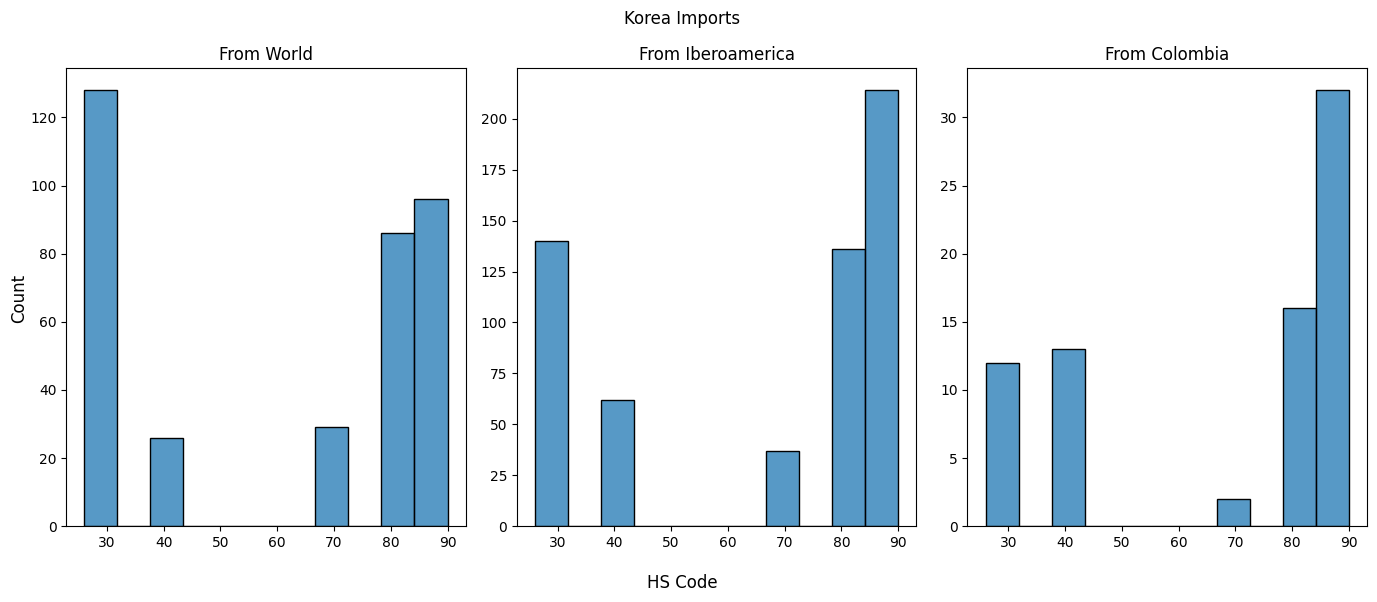

In [5]:
fig, axes = plt.subplots(ncols=3, figsize=(14, 6))
ax1, ax2, ax3 = fig.axes

sns.histplot(df_world, x="cmdCode", binwidth=6, ax=ax1)
sns.histplot(df_iberoamerica, x="cmdCode", binwidth=6, ax=ax2)
sns.histplot(df_colombia, x="cmdCode", binwidth=6, ax=ax3)

ax1.set_xlabel("")
ax1.set_ylabel("")
ax2.set_xlabel("")
ax2.set_ylabel("")
ax3.set_xlabel("")
ax3.set_ylabel("")

ax1.set_title("From World")
ax2.set_title("From Iberoamerica")
ax3.set_title("From Colombia")

fig.supxlabel("HS Code")
fig.supylabel("Count")
fig.suptitle("Korea Imports")

plt.tight_layout()
plt.show()

## Binary Distribution

In [6]:
pivot_df = df.pivot_table(values="primaryValue", index="partnerDesc", columns="cmdCode")

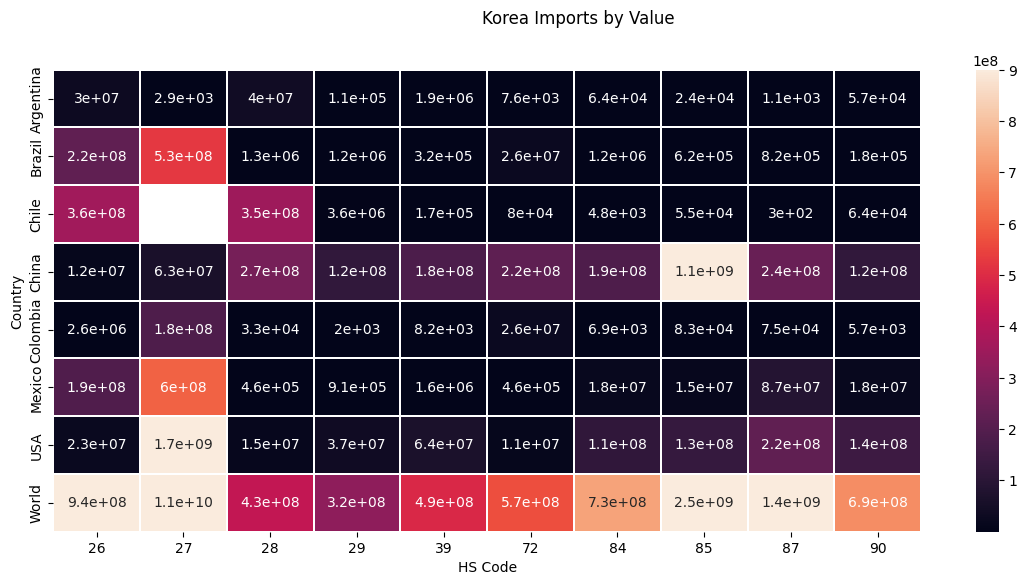

In [7]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.heatmap(pivot_df, vmax=9e8, linewidths=0.2, annot=True)

ax.set_xlabel("HS Code")
ax.set_ylabel("Country")

fig.suptitle("Korea Imports by Value")

plt.show()

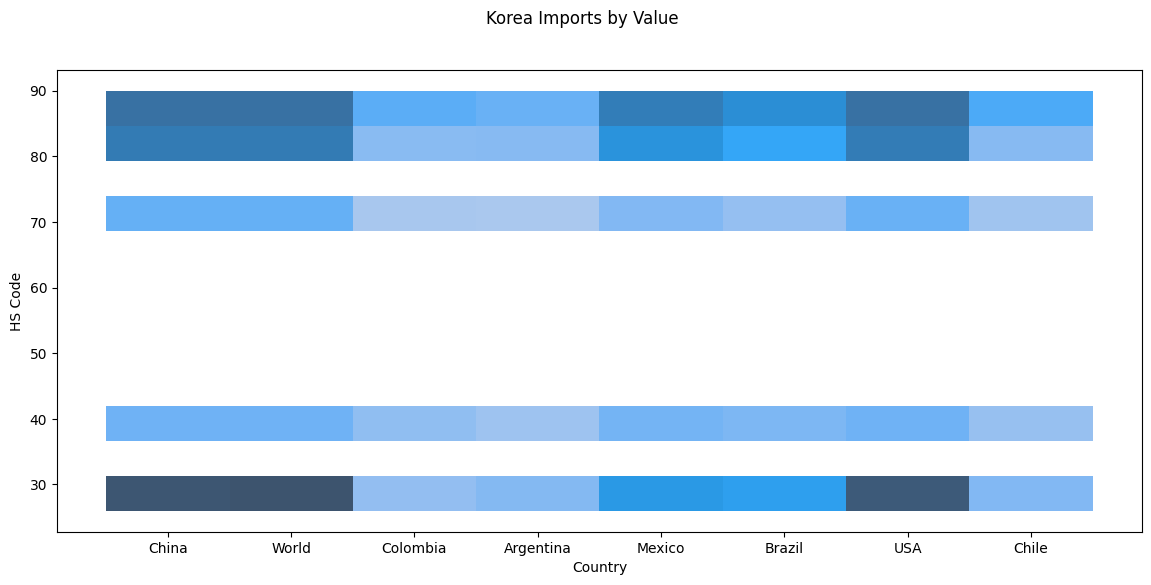

In [8]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.histplot(df, x="partnerDesc", y="cmdCode")

ax.set_xlabel("Country")
ax.set_ylabel("HS Code")

fig.suptitle("Korea Imports by Value")

plt.show()